# Palantir

In [1]:
import palantir
import scanpy as sc
import numpy as np
import os

# Plotting 
import matplotlib
import matplotlib.pyplot as plt

# Inline plotting
%matplotlib inline

# Reset random seed
np.random.seed(5)

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
findfont: Font family ['Raleway'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Lato'] not found. Falling back to DejaVu Sans.


In [18]:
%matplotlib inline


In [13]:
import harmony

In [2]:
ad = sc.read_h5ad("/omics/groups/OE0533/internal/katharina/scDoRI/gastrulation_data/old_data_three_timepoints/old_anndata_rna.h5ad")

In [3]:
sc.pp.normalize_per_cell(ad)

In [4]:
palantir.preprocess.log_transform(ad)


In [5]:
sc.pp.highly_variable_genes(ad, n_top_genes=1500, flavor='cell_ranger')


In [7]:
pca_projections, _ = palantir.utils.run_pca(ad, use_hvg=False)


In [8]:
# Run diffusion maps
dm_res = palantir.utils.run_diffusion_maps(pca_projections, n_components=5)

Determing nearest neighbor graph...


In [9]:
ms_data = palantir.utils.determine_multiscale_space(dm_res)


In [14]:
fdl = harmony.plot.force_directed_layout(dm_res['kernel'], ad.obs_names)


100%|██████████| 500/500 [06:30<00:00,  1.28it/s]

BarnesHut Approximation  took  161.74  seconds
Repulsion forces  took  203.49  seconds
Gravitational forces  took  1.04  seconds
Attraction forces  took  15.52  seconds
AdjustSpeedAndApplyForces step  took  4.58  seconds


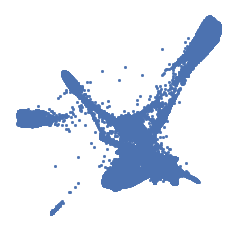

In [19]:
fig, ax = palantir.plot.plot_tsne(fdl)
